In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
pd.set_option("display.max_colwidth",100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/complaints.csv")

### Descripting statistics
Will print the description and info of the dataframe to understand the null values and quartile values

In [3]:
data.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,0,34223255,09/01/2016 12:00:00 AM,09/02/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,10037.0,EAST 135 STREET,EAST 135 STREET,MADISON AVENUE,HARLEM RIVER DRIVE EXIT 21 NB,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Closed,10/01/2016 04:23:55 PM,The Department of Health and Mental Hygiene will review your complaint to determine appropriate ...,09/02/2016 12:00:00 AM,Unspecified MANHATTAN,MANHATTAN,NaN,NaN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,34226273,09/01/2016 12:00:00 AM,01/24/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,NaN,19,19,10 AVE,11 AVE,NaN,NaN,NaN,NaN,NaN,NaN,Closed,10/01/2016 02:25:00 PM,The Department of Health and Mental Hygiene will review your complaint to determine appropriate ...,01/24/2017 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,NaN,NaN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,34213129,09/01/2016 12:00:00 AM,09/04/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11238.0,147 GREENE AVENUE,GREENE AVENUE,WAVERLY AVENUE,WASHINGTON AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,10/01/2016 01:17:58 AM,The Department of Health and Mental Hygiene will review your complaint to determine appropriate ...,09/04/2016 12:00:00 AM,02 BROOKLYN,BROOKLYN,993633.0,189453.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686677,-73.966167,"(40.68667651821694, -73.96616742133907)"
3,3,34214146,09/01/2016 12:00:00 AM,09/07/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11203.0,813 EAST 51 STREET,EAST 51 STREET,AVENUE D,FOSTER AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,10/01/2016 02:03:32 AM,The Department of Health and Mental Hygiene will review your complaint to determine appropriate ...,09/07/2016 12:00:00 AM,17 BROOKLYN,BROOKLYN,1004167.0,172906.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641241,-73.928234,"(40.641241249401865, -73.92823353964022)"
4,4,34216119,09/01/2016 12:00:00 AM,09/07/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11203.0,776 EAST 52 STREET,EAST 52 STREET,AVENUE D,FOSTER AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,10/01/2016 01:59:10 AM,The Department of Health and Mental Hygiene will review your complaint to determine appropriate ...,09/07/2016 12:00:00 AM,17 BROOKLYN,BROOKLYN,1004421.0,172914.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641263,-73.927318,"(40.64126263285648, -73.92731828387933)"


In [4]:
data.describe()

,Unnamed: 0,Unique Key,Incident Zip,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
count,3101.000000,3.101000e+03,3096.000000,0.0,3.080000e+03,3080.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.000000,3080.000000
mean,93444.976459,3.433324e+07,10724.632106,NaN,1.003518e+06,207289.237662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.735591,-73.930441
std,54588.832628,6.502021e+04,721.506965,NaN,2.114737e+04,30269.423060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083086,0.076263
min,0.000000,3.421204e+07,83.000000,NaN,9.154590e+05,123092.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.504288,-74.247383
25%,42481.000000,3.427592e+07,10128.000000,NaN,9.930858e+05,185758.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676481,-73.968089
50%,95678.000000,3.433468e+07,10473.000000,NaN,1.002143e+06,204077.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726764,-73.935504
75%,141031.000000,3.438862e+07,11226.000000,NaN,1.014570e+06,234612.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.810610,-73.890706
max,183820.000000,3.444313e+07,11694.000000,NaN,1.065171e+06,270023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.907780,-73.708039


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3101 non-null   int64  
 1   Unique Key                      3101 non-null   int64  
 2   Created Date                    3101 non-null   object 
 3   Closed Date                     2837 non-null   object 
 4   Agency                          3101 non-null   object 
 5   Agency Name                     3101 non-null   object 
 6   Complaint Type                  3101 non-null   object 
 7   Descriptor                      3101 non-null   object 
 8   Location Type                   3101 non-null   object 
 9   Incident Zip                    3096 non-null   float64
 10  Incident Address                2915 non-null   object 
 11  Street Name                     2915 non-null   object 
 12  Cross Street 1                  22

In [6]:
useful_data = data[['Created Date','Closed Date','Location Type','Incident Zip','Incident Address','Due Date',
                    'Street Name','Cross Street 1','Cross Street 2', 'Address Type', 'City', 'Status',
                    'Community Board','Borough', 'Park Borough', 'Latitude','Longitude','Descriptor']]

# Dropping Columns that won't help in our analysis(including empty columns and columns with only a single value)                   

In [7]:
useful_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Created Date      3101 non-null   object 
 1   Closed Date       2837 non-null   object 
 2   Location Type     3101 non-null   object 
 3   Incident Zip      3096 non-null   float64
 4   Incident Address  2915 non-null   object 
 5   Due Date          3101 non-null   object 
 6   Street Name       2915 non-null   object 
 7   Cross Street 1    2235 non-null   object 
 8   Cross Street 2    2234 non-null   object 
 9   Address Type      3097 non-null   object 
 10  City              3096 non-null   object 
 11  Status            3101 non-null   object 
 12  Community Board   3101 non-null   object 
 13  Borough           3101 non-null   object 
 14  Park Borough      3101 non-null   object 
 15  Latitude          3080 non-null   float64
 16  Longitude         3080 non-null   float64


In [8]:
useful_data.describe()

,Incident Zip,Latitude,Longitude
count,3096.000000,3080.000000,3080.000000
mean,10724.632106,40.735591,-73.930441
std,721.506965,0.083086,0.076263
min,83.000000,40.504288,-74.247383
25%,10128.000000,40.676481,-73.968089
50%,10473.000000,40.726764,-73.935504
75%,11226.000000,40.810610,-73.890706
max,11694.000000,40.907780,-73.708039


##Primary Data Exploration
Will find out the value counts of important columns and find the correlation between columns

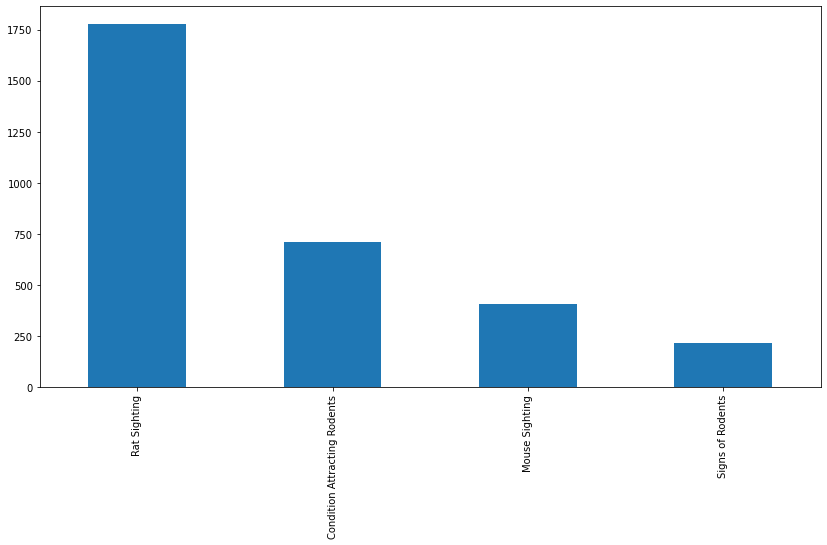

In [9]:
data['Descriptor'].value_counts().plot(kind='bar',figsize=(14,7))

In [10]:
useful_data.corr()

,Incident Zip,Latitude,Longitude
Incident Zip,1.000000,-0.421770,0.335074
Latitude,-0.421770,1.000000,0.347973
Longitude,0.335074,0.347973,1.000000


In [11]:
for column in useful_data.columns:
    print(useful_data[column].isna().sum().sum())

0
264
0
5
186
0
186
866
867
4
5
0
0
0
0
21
21
0


In [12]:
for column in useful_data.columns:
    useful_data[column].fillna(useful_data[column].mode()[0], inplace=True)

# Replacing NaN by mode values

##Choice of Analysis: Feature Extraction

We will make some features from existing data to feed better data to the model

In [13]:
useful_data['Created Date'] = pd.to_datetime(useful_data['Created Date']) 
useful_data['Closed Date'] = pd.to_datetime(useful_data['Closed Date'])
useful_data['Due Date'] = pd.to_datetime(useful_data['Due Date'])

# Converting dates from string to datetime

In [14]:
useful_data['Time Between Close'] = (useful_data['Closed Date'] - useful_data['Created Date']).dt.days
useful_data['Time to Due'] = (useful_data['Due Date'] - useful_data['Created Date']).dt.days
useful_data['Time to Close'] = (useful_data['Due Date'] - useful_data['Closed Date']).dt.days

# Creating new features to help us analyze the data better

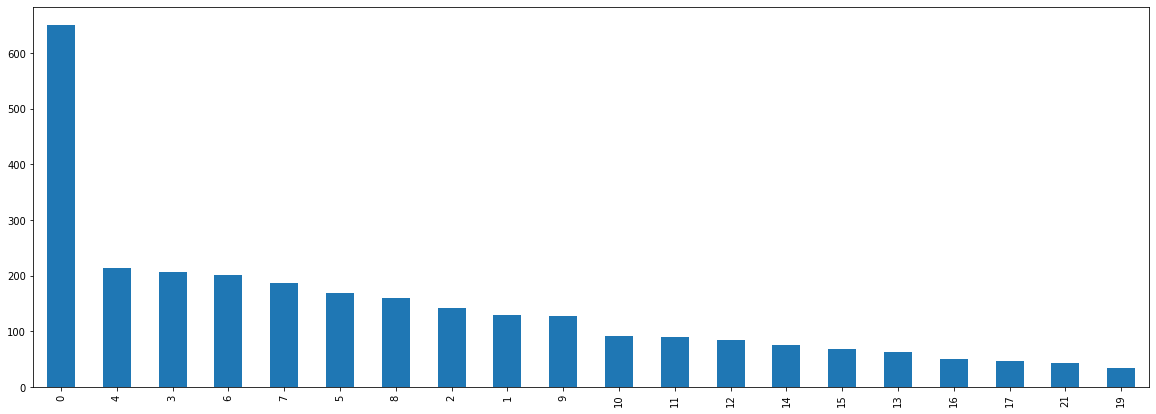

In [15]:
useful_data['Time Between Close'].value_counts().head(20).plot(kind='bar',figsize=(20,7))

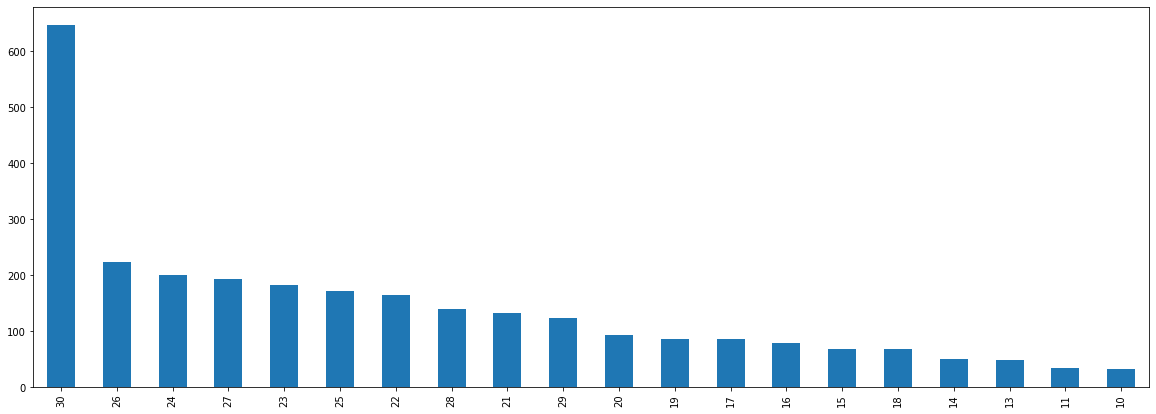

In [16]:
useful_data['Time to Close'].value_counts().head(20).plot(kind='bar',figsize=(20,7))

In [17]:
useful_data['Created Date'] = pd.to_datetime(useful_data['Created Date']).dt.to_period('M')
useful_data['Closed Date'] = pd.to_datetime(useful_data['Closed Date']).dt.to_period('M')
useful_data['Due Date'] = pd.to_datetime(useful_data['Due Date']).dt.to_period('M')

# Transforming timestamp to month level detail to avoid extra columns in one hot encoding

In [18]:
useful_data = useful_data.drop(['Created Date', 'Closed Date', 'Due Date'], axis=1)

# Dropping columns for which we have already have the new features

In [19]:
useful_data.columns

Index(['Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Address Type', 'City', 'Status',
       'Community Board', 'Borough', 'Park Borough', 'Latitude', 'Longitude',
       'Descriptor', 'Time Between Close', 'Time to Due', 'Time to Close'],
      dtype='object')

In [20]:
useful_data = useful_data[useful_data['Descriptor']!='Condition Attracting Rodents']
# Removing Condition Attracting Rodents cases

In [21]:
df = useful_data[['Latitude','Longitude','Descriptor']]

df.head()

,Latitude,Longitude,Descriptor
0,40.824595,-73.877299,Rat Sighting
1,40.824595,-73.877299,Rat Sighting
2,40.686677,-73.966167,Rat Sighting
3,40.641241,-73.928234,Rat Sighting
4,40.641263,-73.927318,Rat Sighting


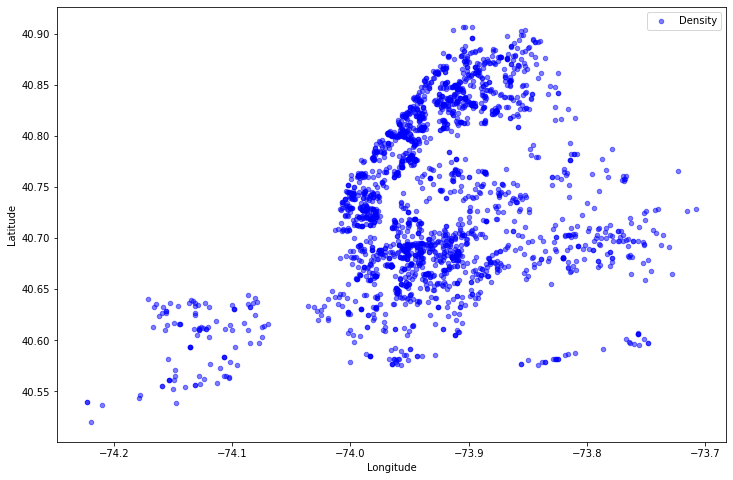

In [22]:
df.plot(kind="scatter", x="Longitude", y="Latitude", label="Density",
    c="blue", cmap=plt.get_cmap("magma"),
    colorbar=False, alpha=0.5, figsize=(12,8),)
plt.legend()
plt.show()

We can see some pockets of dense 

In [23]:
df['Color'] = df['Descriptor']
r = {'Rat Sighting': 'red', 'Mouse Sighting':'blue', 'Signs of Rodents':'green'}
df = df.replace({"Color": r})

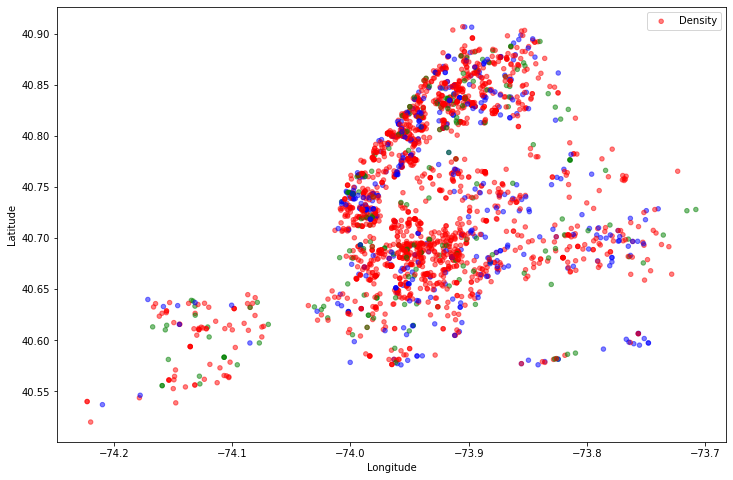

In [24]:
df.plot(kind="scatter", x="Longitude", y="Latitude", label="Density",
    c=df['Color'], cmap=plt.get_cmap("magma"),
    colorbar=False, alpha=0.5, figsize=(12,8),)
plt.legend()
plt.show()

We still see some pockets of Rat seeing, Mouse seeing and Signs of rodents, Location looks to be a factor in rodent descriptor

## Variable Exploration

In [25]:
y = useful_data['Descriptor'] # Assigning the test/target variable  
X = useful_data.drop('Descriptor',axis=1) # Assigning the training data
X = pd.get_dummies(X, drop_first = True) # Employing one hot encoding to convert categorical variables to ML friendly numerical format
y = pd.DataFrame(y)

In [26]:
r = {'Rat Sighting': 0, 'Mouse Sighting':1, 'Condition Attracting Rodents':2, 'Signs of Rodents':3}
y = y.replace({"Descriptor": r})

## Choice of Model
We will try to predict the Descriptor by using Supervised Machine Learning Algorithm as we have labelled data to check on our performance.

We will choose Random Forest because:

1. As a decision tree algorithm, Random Forests are less influenced by outliers than other algorithms.

2. RF's don't make any assumptions about the underlying distribution of your data, and can implicitly handle collinearity in features, because if you have two highly similar features, the information gain from splitting on one of the features will also use up the predictive power of the other feature. Read about it here.

3. It's possible to extract the 'best' features (which could be the total number of times a feature was used to split on the data, or the mean decrease in impurity etc).

4. Comparatively faster in comparison to Gradient Boost and XGBoost

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [29]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
y_pred = neigh.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6931106471816284

Now we will try to use the Random forest classifier

In [32]:
def train_RF(n_est,depth):
    rf=RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
    rf_model=rf.fit(X_train,y_train)
    y_pred=rf_model.predict(X_test)
    print("n_est:",n_est,"depth:",depth,accuracy_score(y_test, y_pred))
for n_est in [50,100,150,200]:
    for depth in [20,30,60, 90, None]:
        train_RF(n_est,depth)

n_est: 50 depth: 20 0.7411273486430062
n_est: 50 depth: 30 0.7578288100208769
n_est: 50 depth: 60 0.7661795407098121
n_est: 50 depth: 90 0.755741127348643
n_est: 50 depth: None 0.7536534446764092
n_est: 100 depth: 20 0.7348643006263048
n_est: 100 depth: 30 0.755741127348643
n_est: 100 depth: 60 0.7536534446764092
n_est: 100 depth: 90 0.7599164926931107
n_est: 100 depth: None 0.7640918580375783
n_est: 150 depth: 20 0.7390396659707724
n_est: 150 depth: 30 0.7473903966597077
n_est: 150 depth: 60 0.7599164926931107
n_est: 150 depth: 90 0.755741127348643
n_est: 150 depth: None 0.7536534446764092
n_est: 200 depth: 20 0.7411273486430062
n_est: 200 depth: 30 0.7494780793319415
n_est: 200 depth: 60 0.7599164926931107
n_est: 200 depth: 90 0.7536534446764092
n_est: 200 depth: None 0.7578288100208769


In [33]:
rf=RandomForestClassifier(n_jobs=-1)
k_fold=KFold(n_splits=5)
cross_val_score(rf, X, y, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.74947808, 0.78914405, 0.75574113, 0.74947808, 0.73849372])

In [35]:
rf=RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs= -1) # using the better 
rf_model=rf.fit(X_train,y_train)
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[:5] # Important features used to make the prediction

[(0.04296778388056617, 'Latitude'),
 (0.0417693330182492, 'Longitude'),
 (0.03231926797825544, 'Time Between Close'),
 (0.03125935109503732, 'Time to Close'),
 (0.03040176504033417, 'Incident Zip')]

The user created features are helping in making the classification decision 